In [2]:
import os

In [40]:
import numpy as np
import pandas as pd
from math import *

path = "../sim/results/"
pir_list = [50, 100, 150, 200, 250, 300, 350, 400, 500, 600, 700, 800, 900, 1000]
burst_list = [1, 2, 4, 8, 16]

mean_latencies_burst = list()
disp_latencies_burst = list()

file_prefix = "burst_mesh_18x10_DOR_mp_4_sv_3_sh_3"

for burst in burst_list:
  mean_latencies = list()
  disp_latencies = list()
  for pir in pir_list:
    file = '_'.join([file_prefix, "pir", str(pir), "ps", str(burst), "latency.log"])

    latencies = list()
    lat_distribution = dict()

    with open(path + file, 'r') as f:
      data_lines = f.readlines()
      for line in data_lines:
        latency = int(line.split()[-1]) / burst
        latencies.append(latency)
      latencies_ = np.array(latencies)
      min_num = int(latencies_.size*1.0)
      latencies_.sort()
      latencies_=latencies_[:min_num]
    data = np.array(latencies_)
    min_num = int(data.size)
    data.sort()
    data=data[:min_num]
    max_lat = data[-1]
    mean_latencies.append(np.mean(data))
    disp_latencies.append(sqrt(np.var(data)))
  print(burst)
  print(mean_latencies)
  print(disp_latencies)
  mean_latencies_burst.append(mean_latencies)
  disp_latencies_burst.append(disp_latencies)

df = pd.DataFrame(mean_latencies_burst)
df.to_excel(file_prefix + ".xlsx")

1
[44.5112843660238, 44.593649042628634, 45.00956595027392, 45.45501251068703, 45.973244503497206, 46.86629992574542, 48.182196178801554, 50.55615754430589, 67.89497163210963, 82.7478194802186, 103.75362812563876, 139.0772021131294, 142.1589379283926, 140.81932471999835]
[17.09130643862975, 17.200490195998835, 17.360894764559152, 17.511121951218733, 17.78967195787016, 18.221027521015124, 19.096990376961323, 20.80765854867641, 42.38745068308974, 65.12614341027589, 128.5277063381237, 252.11713262070944, 256.6771880108306, 267.1291157275938]
2
[22.992393285974728, 23.114099810093087, 23.32699242887572, 23.63902702195534, 24.011825428758236, 24.52733241152194, 25.412975712891683, 27.78922548506338, 99.04161136380583, 117.61457693545086, 123.42277454569958, 126.16422209789364, 121.09958400449246, 123.54953912666215]
[8.573973299595503, 8.620793063427145, 8.70592818812376, 8.845032530223236, 9.009378219015941, 9.32341326461177, 9.991213104167048, 12.732523323483441, 283.37194320371106, 322.5

In [30]:
import numpy as np
import pandas as pd
from math import *

path = "../sim/results/"
pir_list = [50, 100, 150, 200, 250, 300, 350, 400, 500, 600, 700, 800, 900, 1000]
burst_list = [1, 2, 4, 8, 16]
file = "burst_mesh_18x10_DOR_mp_4_sv_3_sh_3_pir_500_ps_1_latency.log"

ve_tile_x = '[x][3][0]'
ve_tile_y = '[y][3][0]'

mean_latencies_burst = list()
disp_latencies_burst = list()

for burst in burst_list:
  mean_latencies = list()
  disp_latencies = list()
  for pir in pir_list:
    file = '_'.join(["burst_mesh_18x10_DOR_mp_4_sv_3_sh_3_pir", str(pir), "ps", str(burst), "latency.log"])

    latencies = list()
    lat_distribution = dict()

    with open(path + file, 'r') as f:
      data_lines = f.readlines()
      for line in data_lines:
        # if line.split()[0] == ve_tile_x or line.split()[0] == ve_tile_y:
          latency = int(line.split()[-1]) / burst
          latencies.append(latency)
      latencies_ = np.array(latencies)
      min_num = int(latencies_.size*0.99)
      latencies_.sort()
      latencies_=latencies_[:min_num]
      for line in data_lines:
        if line.split()[0] == ve_tile_x or line.split()[0] == ve_tile_y:
          mem_tile = line.split()[2]
          latency = int(line.split()[-1])
          if mem_tile not in lat_distribution.keys():
            lat_distribution[mem_tile] = list()
          if latency in latencies_:
            lat_distribution[mem_tile].append(latency)

    data = np.array(latencies_)
    min_num = int(data.size)
    data.sort()
    data=data[:min_num]
    max_lat = data[-1]
    # print(np.mean(data))
    # print(sqrt(np.var(data)))
    # print(data.size)
    # print(max_lat)
    mean_latencies.append(np.mean(data))
    disp_latencies.append(sqrt(np.var(data)))
  print(burst)
  print(mean_latencies)
  print(disp_latencies)
  mean_latencies_burst.append(mean_latencies)
  disp_latencies_burst.append(disp_latencies)


1
[44.09137865068231, 44.16676217765043, 44.57950409705225, 45.0191497116055, 45.52831729551785, 46.404154848115105, 47.678025372261054, 49.959985363894155, 65.67788371202894, 78.57472502512286, 94.24991053116956, 119.95506387253704, 123.22164948453609, 120.23698134800398]
[16.65488774978726, 16.750575312850486, 16.909135794282044, 17.04925183056684, 17.31469400152013, 17.717022793828924, 18.51242249960092, 20.028119777353417, 33.415083404212055, 48.367374086629816, 83.86920020404068, 155.65712444070857, 166.7141967764431, 164.37068288250825]
2
[22.77802121038928, 22.899289285826598, 23.10785650377061, 23.416211221330638, 23.78039905507011, 24.279727698229078, 25.121667624966914, 27.23874043507872, 77.26754187756086, 95.5297460781707, 97.22691554291679, 99.51963067899773, 98.5729713995701, 101.01019090161225]
[8.347526453262057, 8.393675887074536, 8.47062698421539, 8.604807292597336, 8.752024789576724, 9.034053363920364, 9.597919421108857, 11.309957893385343, 176.20685310988532, 226.53

In [31]:
import matplotlib.pyplot as plt

bins = list(range(np.min(data)-1, np.max(data) + 1))

plt.hist(data, bins)

plt.show()

TypeError: 'numpy.float64' object cannot be interpreted as an integer

Text(85.43818105377981, 220, 'Variance: 37.39')

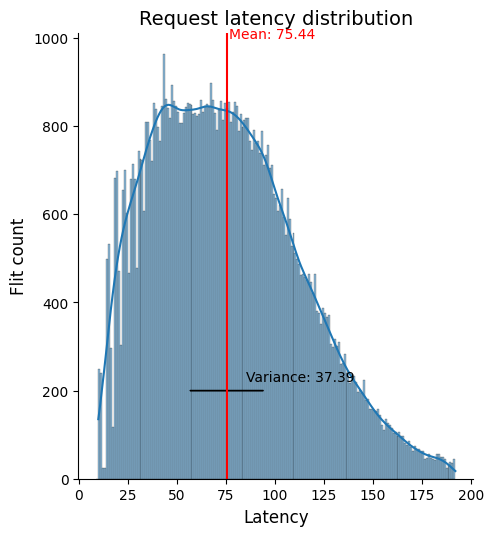

In [21]:
import seaborn as sns

plot = sns.displot(data=data, kde=True, bins=bins, legend=False)
plt.xlabel("Latency", size=12)
plt.ylabel("Flit count", size=12)
plt.title("Request latency distribution", size=14)
plt.axvline(x=data.mean(), color='red')
plt.arrow(
  x=data.mean()-sqrt(data.var())/2,
  y=200,
  dx=sqrt(data.var()),
  dy=0,
  color='black'
)
plt.text(x=data.mean()+1, y=1000, s=f"Mean: {format(data.mean(), '.2f') }", color='red')
plt.text(x=data.mean()+10, y=220, s=f"Variance: {format(sqrt(data.var()), '.2f') }", color="black")

In [72]:
stat_distribution = dict()

stat_distribution['Mem Node X'] = list()
stat_distribution['Mem Node Y'] = list()
stat_distribution['Mean'] = list()
stat_distribution['Variance'] = list()

for key in lat_distribution.keys():
  lat_distribution[key] = np.array(lat_distribution[key])
  lat_handled = list()
  for lat in lat_distribution[key]:
    if lat < max_lat:
      lat_handled.append(lat)
  lat_handled = np.array(lat_handled)
  x_line = key[:key.find(']')+1]
  y_line = key[key.find(']')+1:key.find(':')]
  stat_distribution['Mem Node X'].append(int(x_line[x_line.find('[')+1:x_line.find(']')]))
  stat_distribution['Mem Node Y'].append(int(y_line[y_line.find('[')+1:y_line.find(']')]))
  stat_distribution['Mean'].append(lat_handled.mean())
  stat_distribution['Variance'].append(sqrt(lat_handled.var()))

df = pd.DataFrame(stat_distribution)
df = df.sort_values(by=['Mem Node X', 'Mem Node Y'])
df.to_excel("lat.xlsx")